# TP 2: segmentation and classification of PreTest signals
Topics:
-  Noisy labels
-  Imbalanced dataset
-  Feature extraction
-  Dimension reduction

In [9]:
%load_ext autoreload
%autoreload 2
from data_exploration import get_data, prepare_data
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
data = get_data()
pressure, labels = prepare_data(data)

['station_reference', 'drawdown_start_idx', 'drawdown_end_idx', 'buildup_start_idx', 'buildup_end_idx', 'drawdown_volume', 'drawdown_pressure', 'buildup_volume', 'buildup_pressure', 'buildup_label']


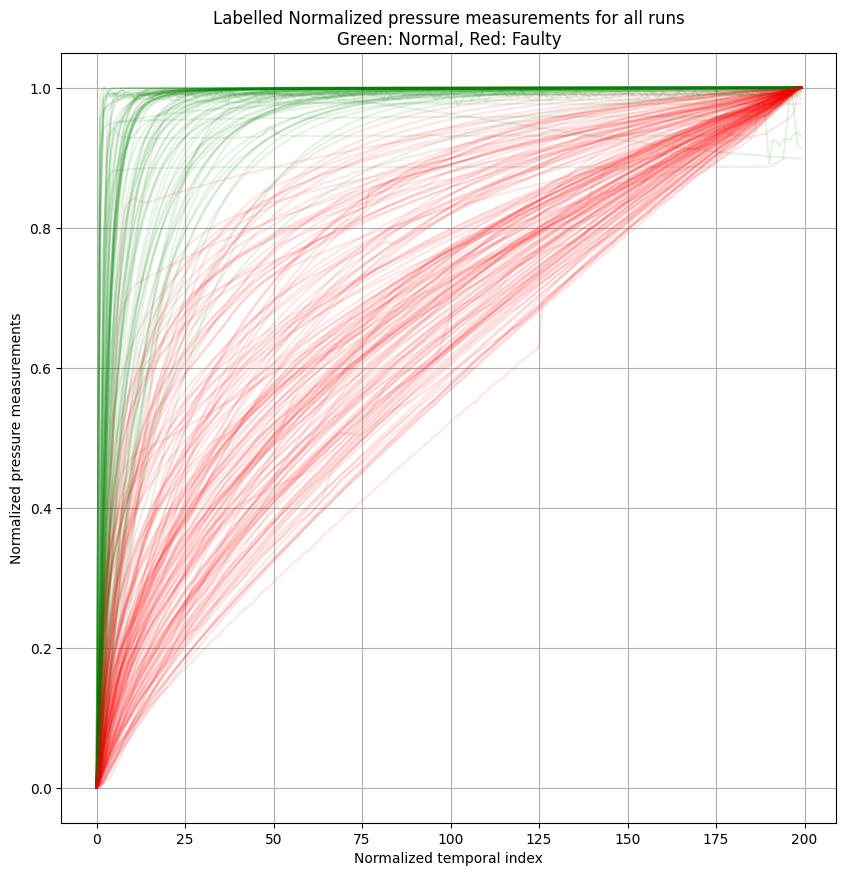

In [11]:
plt.figure(figsize=(10,10))
for press, label in zip(pressure, labels):
    plt.plot(press, "g-" if label==1 else "r-", alpha=0.1)
plt.xlabel("Normalized temporal index")
plt.ylabel("Normalized pressure measurements")
plt.title("Labelled Normalized pressure measurements for all runs\nGreen: Normal, Red: Faulty")
plt.grid()
plt.show()

# Preliminary data analyzis

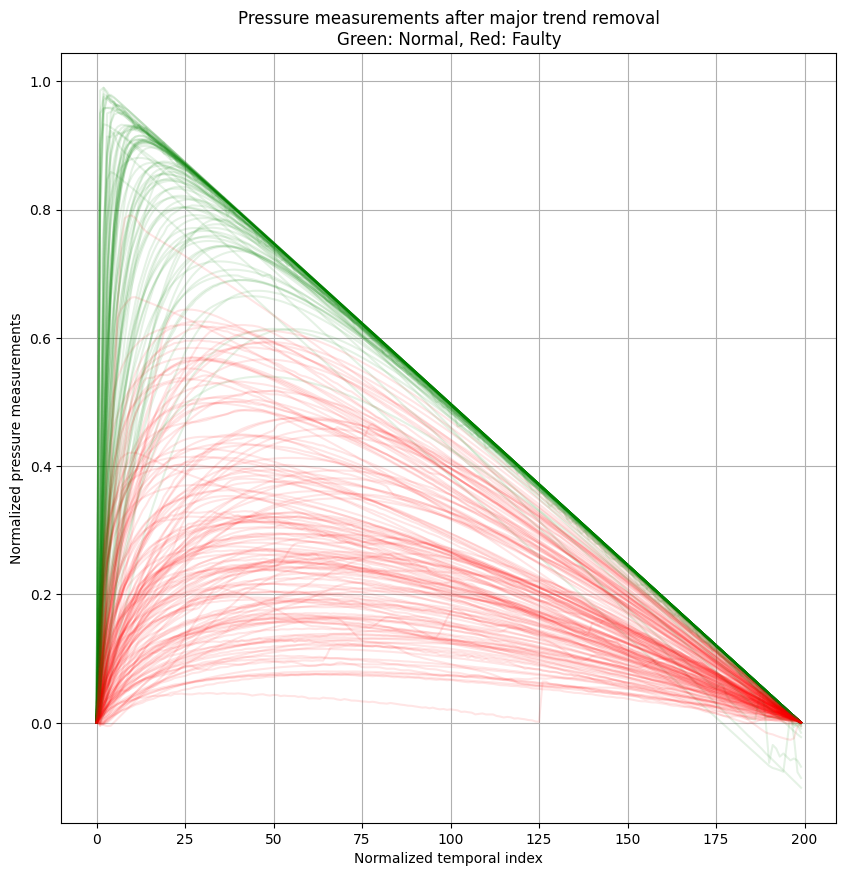

In [24]:
plt.figure(figsize=(10,10))
for press, label in zip(pressure, labels):
    plt.plot(press - np.linspace(0, 1, len(press)), "g-" if label==1 else "r-", alpha=0.1)
plt.xlabel("Normalized temporal index")
plt.ylabel("Normalized pressure measurements")
plt.title("Pressure measurements after major trend removal\nGreen: Normal, Red: Faulty")
plt.grid()
plt.show()

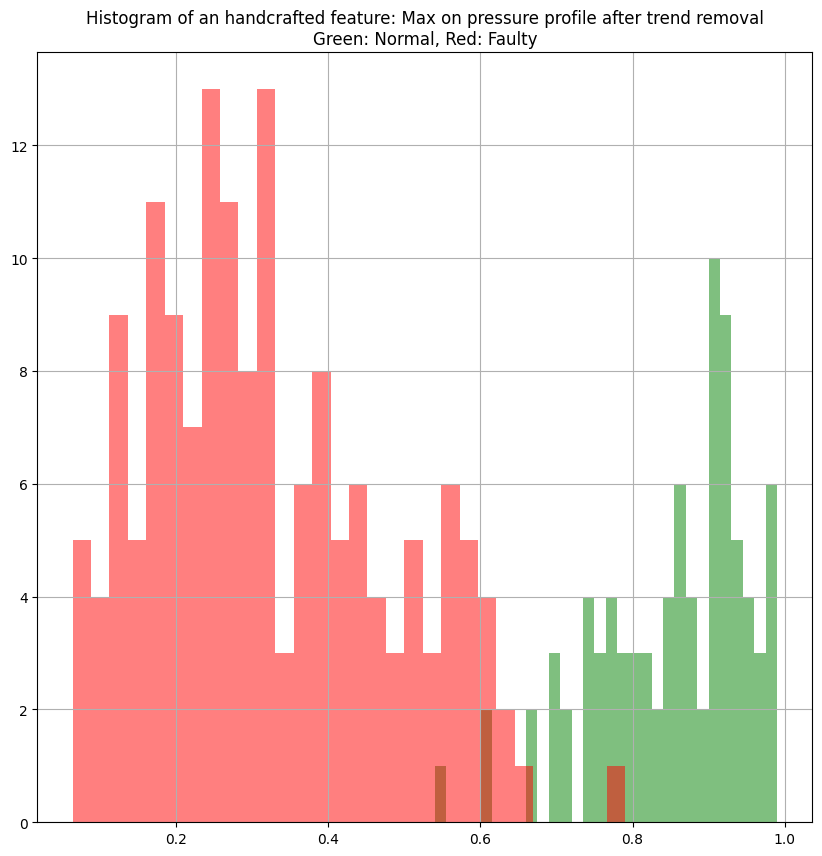

In [25]:
plt.figure(figsize=(10,10))
pos, neg = [], []
for press, label in zip(pressure, labels):
    max_feature = np.max(press - np.linspace(0, 1, len(press)))
    if label == 1:
        pos.append(max_feature)
    else:
        neg.append(max_feature)
plt.hist(pos, bins=30, alpha=0.5, label="Normal", color="green")
plt.hist(neg, bins=30, alpha=0.5, label="Faulty", color="red")
plt.title("Histogram of an handcrafted feature: Max on pressure profile after trend removal\nGreen: Normal, Red: Faulty")
plt.grid()
plt.show()